Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL410250 / EEL7513 / EEL7514 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$

# Exercício 6: Redes Neurais

Neste exercício você irá construir modelos de redes neurais para realizar classificação e regressão.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],np.zeros(np.sum(y==classes[i])),colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],X[y==classes[i],1],colors[i])
    return

def plot_boundary(model, X, colors=['b','r','g','m','c','y'], N=400, gap=1e-9):
    ''' Plot boundary for a 1-D or 2-D classifier '''
    assert len(X.shape) == 2
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        X = np.c_[xx1.reshape(-1)]
    else:
        X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    y_pred = model.predict(X)
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    y_pred = enc.fit_transform(y_pred)
    assert len(enc.classes_) <= len(colors)
    levels = np.arange(len(enc.classes_)+1)-0.5
    y_pred = y_pred.reshape(xx1.shape)
    plt.contourf(xx1,xx2,y_pred,levels,colors=colors,alpha=0.25)
    plt.contour(xx1,xx2,y_pred,levels,colors='k',linewidths=1)
    return

# 1. Conjunto de dados #1

O primeiro conjunto de dados é gerado pelos comandos abaixo.

(300, 2) (300,)
(100, 2) (100,)


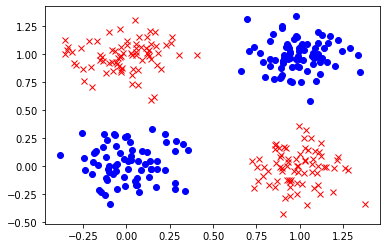

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/4, random_state=0)
plot_data(X_train,y_train)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

## Regressão logística

Para fins de comparação, utilize primeiramente um modelo de regressão logística sem regularização através da biblioteca sklearn. **Para este e demais modelos deste exercício**, realize o treinamento sempre usando o método de otimização L-BFGS (`solver='lbfgs'`), inclusive quando utilizar redes neurais.

Train accuracy: 49.3%
  Val accuracy: 45.0%


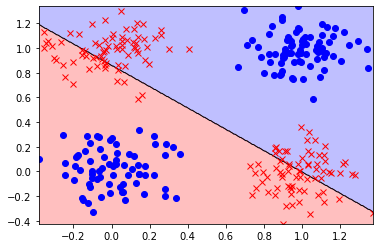

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X_train, y_train)
plot_data(X_train, y_train)
plot_boundary(model, X_train)
print('Train accuracy: {:.1%}'.format(model.score(X_train, y_train)))
print('  Val accuracy: {:.1%}'.format(model.score(X_val, y_val)))

1. Obtenha os pesos $b$ e $\bw$ do modelo treinado.
1. Determine o valor da função custo (perda média) ao fim do treinamento. Como esse valor não é fornecido automaticamente pelo modelo, utilize as funções `.predict_proba()` e `sklearn.metrics.log_loss`.

## Redes neurais

Em seguida, utilize uma rede neural de 1 camada (nenhuma camada oculta) com ativação de saída logística e sem regularização, sempre com `solver='lbfgs'`. Note que o parâmetro `activation` refere-se à ativação das **camadas ocultas** e portanto é irrelevante neste caso particular, podendo ser escolhido como `'identity'`, o que corresponde a uma ativação linear. Já a ativação da camada de saída é escolhida [automaticamente](https://github.com/scikit-learn/scikit-learn/blob/cd8201b7fbdf6876719b44ec0abac85a6da583d2/sklearn/neural_network/_multilayer_perceptron.py#L324) pela função dependendo do tipo de variável de saída (linear se $y$ é *float*, logística se é $y$ categórico com 2 classes, ou softmax se $y$ é categórico com mais de 2 classes). Note também que `alpha` é o parâmetro de regularização, equivalente a `1/C`. 

Train accuracy: 49.3%
  Val accuracy: 45.0%


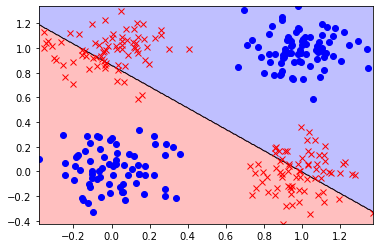

In [4]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=[], activation='identity', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_data(X_train, y_train)
plot_boundary(model, X_train)
print('Train accuracy: {:.1%}'.format(model.score(X_train, y_train)))
print('  Val accuracy: {:.1%}'.format(model.score(X_val, y_val)))

3. Confirme que os dois modelos são aproximadamente idênticos. Para isso, obtenha os parâmetros do modelo, o valor da perda média ao final do treinamento, e o tipo da função de ativação de saída. Dica: veja a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). (Obs: ao contrário da maior parte da literatura, a sklearn contabiliza a camada de entrada no número de camadas da rede.)

4. Ainda com `activation='identity'`, o que acontece quando se aumenta o número de camadas ocultas e o número de unidades por camada (`hidden_layer_sizes`)? Por quê?

5. Em seguida, altere para ativação logística nas camadas ocultas, utilize **uma única camada oculta** com 2 unidades, e treine novamente o modelo, possivelmente rodando diversas vezes até obter uma classificação praticamente perfeita (99% de acurácia de treinamento).
1. Você observa uma variância muito grande entre os modelos obtidos a cada treinamento? Por quê você acredita que isso ocorre? Explique.

 (Dica: se quiser garantir a reprodutibilidade, utilize o parâmetro `random_state`)

7. Agora, experimente aumentar o número de unidades da camada oculta (mantendo ainda uma única camada oculta) e observe as regiões obtidas a cada novo treinamento. Em seguida, varie também o parâmetro de regularização até encontrar uma configuração em que os modelos obtidos são praticamente invariantes a cada nova realização do treinamento.

# 2. Conjunto de dados #2

O próximo conjunto de dados pode ser carregado pelo comando abaixo. Para simplificar, não usaremos conjuntos de validação nem teste.

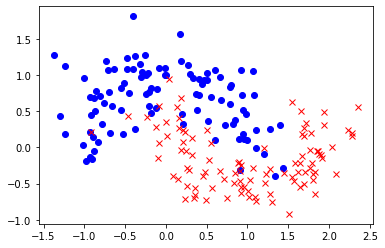

In [5]:
from sklearn.datasets import make_moons
np.random.seed(2019*2)
X, y = make_moons(n_samples=200, noise=0.25)
plot_data(X, y)

1. De forma a demonstrar a flexibilidade das redes neurais, o seu objetivo aqui é obter 100% de acurácia no conjunto de treinamento. Assim como antes, utilize uma rede neural com uma **única** camada oculta com ativação logística, mas adicione quantas unidades forem necessárias. Provavelmente você precisará também aumentar o número de iterações do treinamento, através do parâmetro `max_iter`.

# 3. Conjunto de dados #3

O próximo conjunto de dados pode ser carregado pelo comando abaixo e corresponde a um problema de regressão.

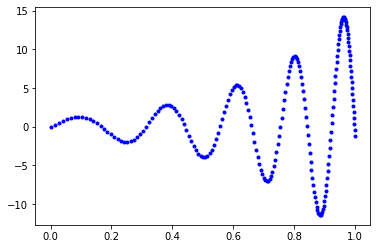

In [6]:
def gen_data(n_samples=200, noise=0.0, random_state=None):
    '''Generate univariate regression dataset'''
    rng = np.random.RandomState(random_state)
    x = rng.permutation(1-np.exp(-np.linspace(0,2.5,n_samples)))
    y = np.sin(2*np.pi*3*np.exp(x))*np.exp(3*x) + noise*rng.randn(n_samples)
    x = x/x.max()
    X = x.reshape(-1,1)
    return X, y

def plot_prediction(model, X, y, prediction_points=False, N=1000):
    '''Plot dataset and predictions for a univariate regression model'''
    assert len(X.shape) == 2 and len(y.shape) == 1
    plt.plot(X[:,0],y,'b.'); plt.xlabel('x'); plt.ylabel('y');
    if N is not None:
        xx = np.linspace(X.min(),X.max(),N)
        yy = model.predict(xx.reshape(-1,1))
        plt.plot(xx,yy,'r-')
    if prediction_points:
        y_pred = model.predict(X)
        plt.plot(X[:,0],y_pred,'r.')
    plt.legend(['True', 'Predicted'])
    return

X, y = gen_data(random_state=0)
plt.plot(X[:,0], y, 'b.');

1. Utilize uma rede neural com ativação de saída linear e perda quadrática (implícitas no modelo [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) da sklearn) para obter um ajuste praticamente perfeito, em particular, com RMSE inferior a 0.2. (Mostre o RMSE obtido.) Fique à vontade para aumentar o número de camadas/unidades/iterações, bem como experimentar outras funções de ativação. Note que o caso abaixo corresponde a uma regressão linear.

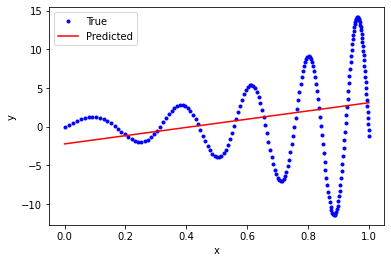

In [7]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[], activation='logistic', solver='lbfgs', alpha=0.0)
model.fit(X, y)
plot_prediction(model, X, y)

2. Em seguida, observe as funções (do único atributo de entrada, $x$) produzidas pelas unidades da primeira camada oculta. Para isso, complete o código abaixo, onde $a = g(\bw^T \bx + b)$ representa a ativação produzida pela unidade. (Obs: podem ser necessárias outras alterações, caso tenha alterado a função de ativação.)

In [ ]:
from scipy.special import expit as sigmoid
assert model.n_layers_ >= 3, 'Must use at least one hidden layer'
n = model.intercepts_[0].shape[0]
@interact(i=(0,n-1))
def plot_first_layer_function(i=0):
    b = model.intercepts_[0][i]
    w = model.coefs_[0][0,i]
    x = np.linspace(0,1,100)
    a = ???
    plt.plot(x, a, '-')
    plt.ylim([-0.05,1.05])
for i in range(n):
    plot_first_layer_function(i)

# 4. Conjunto de dados #4

O próximo conjunto de dados é formado por imagens de dígitos (de 0 a 9) de diversas fontes tipográficas e corresponde a uma versão reduzida e simplificada do conjunto disponível em https://archive.ics.uci.edu/ml/datasets/Character+Font+Images. Para formar este conjunto reduzido foram selecionadas apenas as fontes geradas por computador e excluídas variações da mesma fonte, resultando em um total de 147 fontes, cada uma com 10 imagens (uma por dígito), organizadas em ordem alfabética. As imagens possuem 20x20 pixels, em tons de cinza, com valores de intensidade inteiros entre 0 e 255. O objetivo é classificar os dígitos em pares ($y=0$) ou ímpares ($y=1$).

As imagens das 107 primeiras fontes serão usadas para treinamento, as 20 seguintes para validação e as 20 últimas para teste. Lembre-se de somente utilizar os dados de teste após finalizar a escolha dos hiperparâmetros do seu modelo.

É sempre uma boa prática normalizar os dados, o que, nesse caso, pode ser feito simplesmente dividindo-se cada atributo por 255, de forma que cada atributo esteja na faixa [0,1].

In [8]:
df = pd.read_csv('https://github.com/danilo-silva-ufsc/ml/raw/master/data/fontdigits.csv.gz', index_col=0)
df.head()

,digit,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,9,AGENCY,AGENCY FB,57,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60
1,8,AGENCY,AGENCY FB,56,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60
2,7,AGENCY,AGENCY FB,55,0.4,0,0.0,35,22,51,...,27,1,1,1,1,1,1,1,1,1
3,6,AGENCY,AGENCY FB,54,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60
4,5,AGENCY,AGENCY FB,53,0.4,0,0.0,35,24,51,...,255,255,255,255,255,255,255,255,165,60


In [9]:
test_size = 200
val_size = test_size

X_train = df.iloc[:-(val_size+test_size),-400:].to_numpy(dtype=int)/255
y_train = df.iloc[:-(val_size+test_size),0].to_numpy(dtype=int) % 2

X_val = df.iloc[-(val_size+test_size):-test_size,-400:].to_numpy(dtype=int)/255
y_val = df.iloc[-(val_size+test_size):-test_size,0].to_numpy(dtype=int) % 2

X_test = df.iloc[-test_size:,-400:].to_numpy(dtype=int)/255
y_test = df.iloc[-test_size:,0].to_numpy(dtype=int) % 2

# save for later
X_train_full = X_train.copy()
X_val_full = X_val.copy()
X_test_full = X_test.copy()

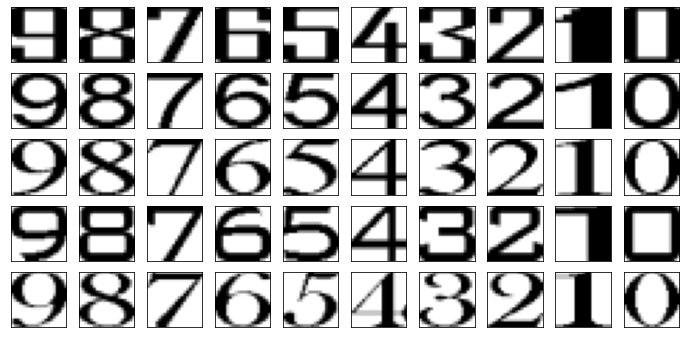

In [10]:
plt.figure(figsize=(12,12))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.imshow(X_train_full[i].reshape(20,20),cmap=plt.cm.gray_r);
    plt.xticks([]);
    plt.yticks([]);

1. O modelo de regressão logística (i.e., rede neural contendo somente uma unidade de saída, sem nenhuma camada oculta) será o nosso **baseline** de comparação. Mostre que, com esse modelo (e uma escolha adequada de hiperparâmetros), é possível atingir uma acurácia de validação de 96%, com acurácia de treinamento de 100%. Em seguida, calcule a acurácia de teste.

#### Dica:
- Se quiser usar a função GridSearchCV para buscar hiperparâmetros de forma eficiente, com conjunto de validação fixo (*hold-out*), você pode usar o método `sklearn.model_selection.PredefinedSplit` na opção `cv`. Por exemplo:
```python 
    gs = GridSearchCV(..., refit=False, cv=PredefinedSplit([-1]*len(X_train) + [0]*len(X_val)), refit=False)
    gs.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])
    print('Best hyperparameters:', gs.best_params_)
```
ou simplesmente a função `grid_search` fornecida no Exercício 5.

Claramente, esse é um problema fácil demais, então vamos dificultá-lo. Para isso, escolheremos como atributos **apenas 7 pixels** aleatórios da imagem.

In [11]:
rng = np.random.RandomState(0)
cols = rng.permutation(400)[:7]
X_train = X_train_full[:,cols]
X_val = X_val_full[:,cols]
X_test = X_test_full[:,cols]

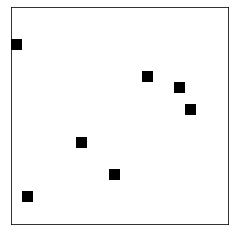

In [12]:
blank = np.zeros(400)
blank[cols] = 1
plt.imshow(blank.reshape(20,20),cmap=plt.cm.gray_r);
plt.xticks([]);
plt.yticks([]);

2. Encontre o maior valor que você puder da acurácia de validação para a regressão logística. (Você consegue obter 64%?) Em seguida, calcule a acurácia de teste.

3. Agora, utilize uma rede neural com uma única camada oculta, mas com quantas unidades desejar. Além do número de unidades da camada oculta, você pode variar também a função de ativação, o parâmetro de regularização e o parâmetro `random_state` (que afeta a inicialização dos pesos). Siga a metodologia abaixo, que corresponde a primeiramente evitar underfitting e em seguida controlar o overfitting. **Obs:** realize cada item abaixo em uma célula diferente, para deixar registrada sua solução.
 1. Inicialmente, mantenha o valor padrão `max_iter=200` (para um treinamento rápido) e tente maximizar a acurácia de treinamento. (Obs: ignore eventuais *warnings* sobre convergência.)
 2. Para os valores de hiperparâmetros encontrados, altere para `max_iter=2000` (para maximizar o desempenho) e repita o treinamento. Verifique que a acurácia de treinamento ficou superior a 95%. Calcule também a acurácia de validação.
 3. Retorne para `max_iter=200` e tente atingir uma acurácia de validação de pelo menos 75%. Após a escolha do modelo, calcule também a acurácia de teste.

#### Dicas
- O objetivo dessa questão não é fazer uma busca exaustiva (e computacionalmente intensa) de hiperparâmetros, mas sim variá-los manualmente de maneira exploratória (por alguns minutos) de forma a ganhar *insight*.
- Uma forma conveniente de realizar essa exploração é usando a função `interact`, por exemplo:
```python
@interact(random_state=(0,20), n=(1,101), log10alpha=(-6,3,0.5), activation=['logistic','tanh','relu'])
def _(random_state=0, n=1, log10alpha=-6, activation='logistic'):
    model = MLPClassifier(...)
    ...
```
- Note que os valores iniciais dos parâmetros do `interact` são definidos pelos valores padrão dos argumentos da função a ser executada.
- Uma desvantagem do `interact` é que o resultado não fica salvo no notebook. Assim, para deixar registrada sua solução, você tem duas opções: (1) ao finalizar a exploração, criar uma nova célula sem `interact` utilizando os valores de hiperparâmetros selecionados; ou (2) definir os valores de hiperparâmetros escolhidos como sendo os valores padrão da função a ser executada.

In [ ]:
# A

In [ ]:
# B

In [ ]:
# C

4. Comente sobre os resultados encontrados.

# 5. Conjunto de dados #5

A última parte do exercício trata de um pequeno problema-desafio com intuito de proporcionar alguns insights sobre redes neurais através da experimentação e visualização.

1. Tente conseguir 100% de acurácia nos conjuntos de treinamento e teste para o problema de classificação "Spiral" (sem ruído) em https://playground.tensorflow.org/#dataset=spiral , porém sem utilizar atributos adicionais (além de $x_1$ e $x_2$). (Obs: a interface não mostra a acurácia, mas é fácil de deduzir pelas regiões de decisão.) Insira sua solução como imagem integrada ao notebook, o que pode ser feito das seguintes formas: (a) apenas colando (Ctrl-V) diretamente em uma célula Markdown, se estiver usando Jupyter Lab, ou (b) usando a opção do menu  *Edit -> Insert Image*, se estiver usando a interface clássica do Jupyter Notebook.
1. Relate o seu processo de desenvolvimento, isto é, quais arquiteturas e hiperparâmetros você experimentou, o seu raciocínio por trás das suas escolhas, e suas conclusões com esse exercício.
1. (OPCIONAL) Reflita: o que acontece se a primeira camada oculta possui apenas 1 unidade, mesmo quando a segunda camada possui 8?

(OPCIONAL) Experimente também outros conjuntos de dados no mesmo site.